# House Price Prediction Workflow

## Objective
Develop a machine learning pipeline for predicting house prices using exploratory data analysis, preprocessing, and model training.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('../dataset/housing_data.csv')

# Display basic information
display(df.info())
display('\nDataset Shape:', df.shape)
display('\nFirst 5 rows:\n', df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

'\nDataset Shape:'

(545, 13)

'\nFirst 5 rows:\n'

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


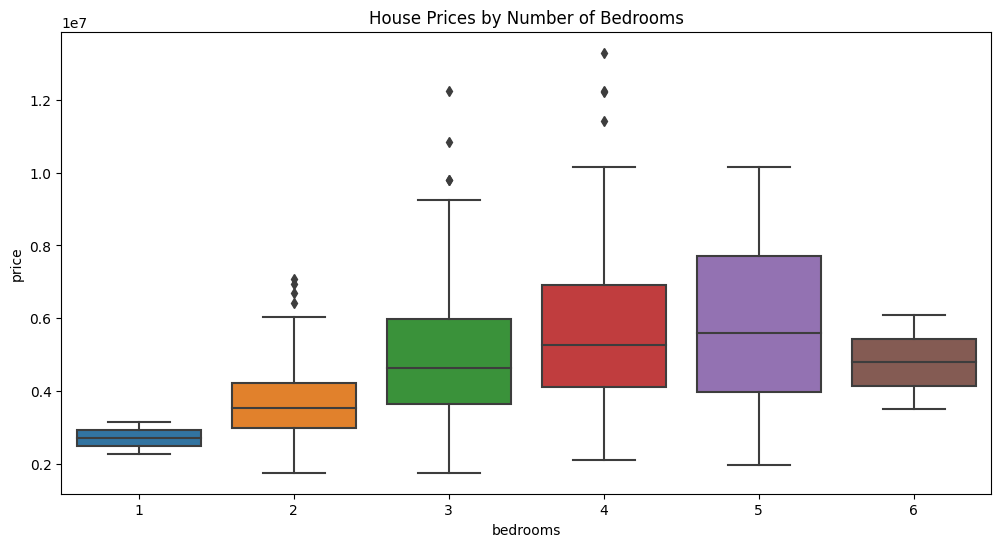

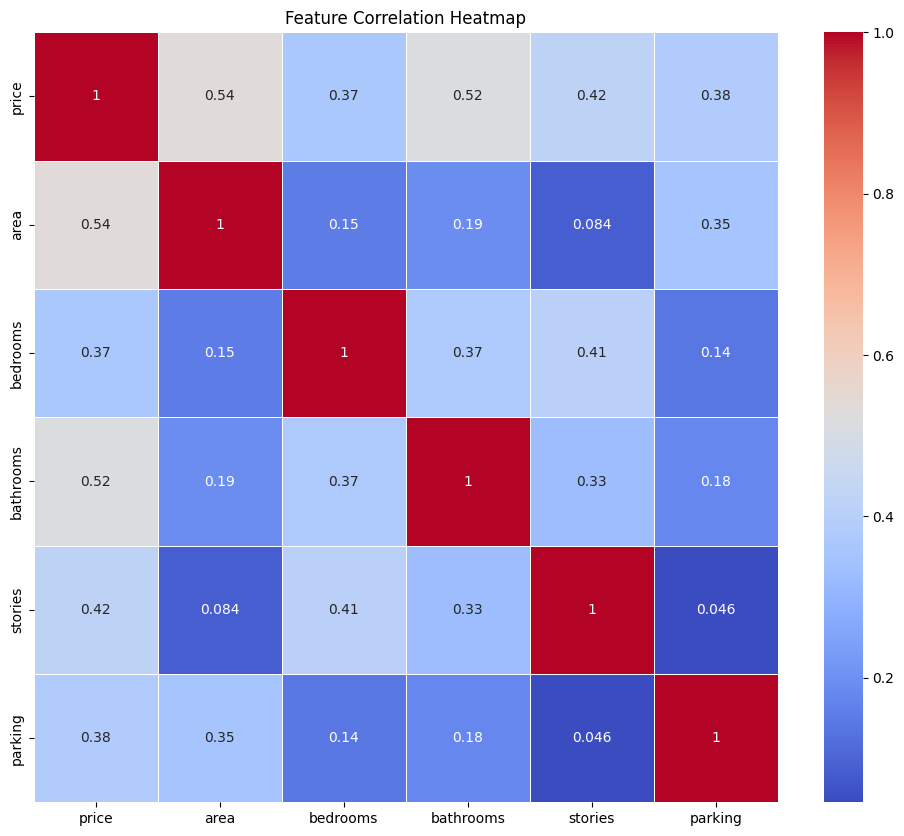

In [3]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('House Prices by Number of Bedrooms')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [4]:
# Preprocessing
# Select features and target
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 
    'mainroad', 'guestroom', 'basement', 
    'hotwaterheating', 'airconditioning', 
    'parking', 'prefarea'
]

X = df[features]
y = df['price']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=[
    'mainroad', 'guestroom', 'basement', 
    'hotwaterheating', 'airconditioning', 'prefarea'
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    max_depth=10
)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Model Performance Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Model Performance Metrics:
Mean Absolute Error: 1075138.2539630781
Root Mean Squared Error: 1446791.9191846203
R-squared: 0.5858783723650038


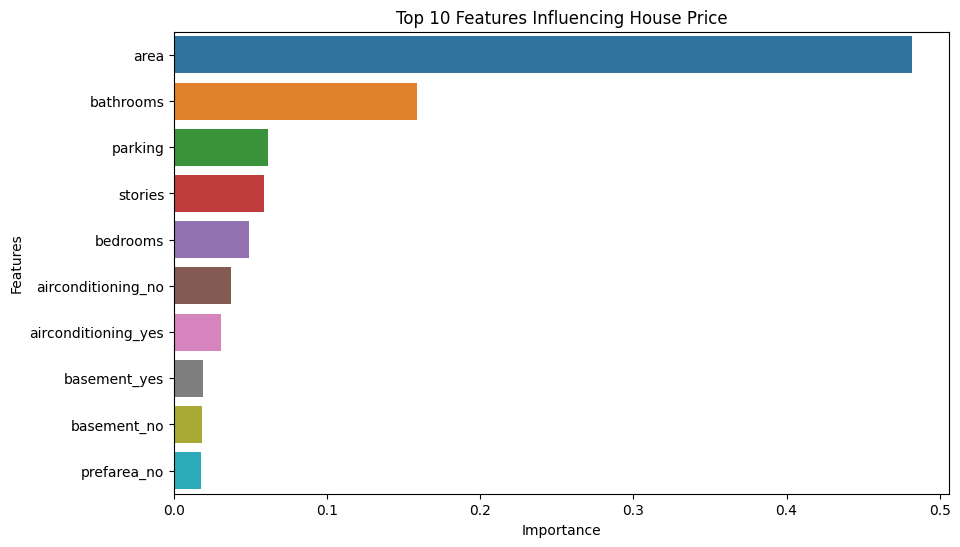

In [6]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features Influencing House Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [7]:
# Save model and preprocessing artifacts
import joblib

joblib.dump(rf_model, '../src/trained_model.pkl')
joblib.dump(scaler, '../src/scaler.pkl')

with open('../src/feature_names.txt', 'w') as f:
    f.write('\n'.join(X.columns))